# Least Squares Kronecker Product Factorization (LSKronF)

In [30]:
import numpy as np
from numpy import kron
from numpy.linalg import svd, norm
from numpy.random import randn, rand
import time

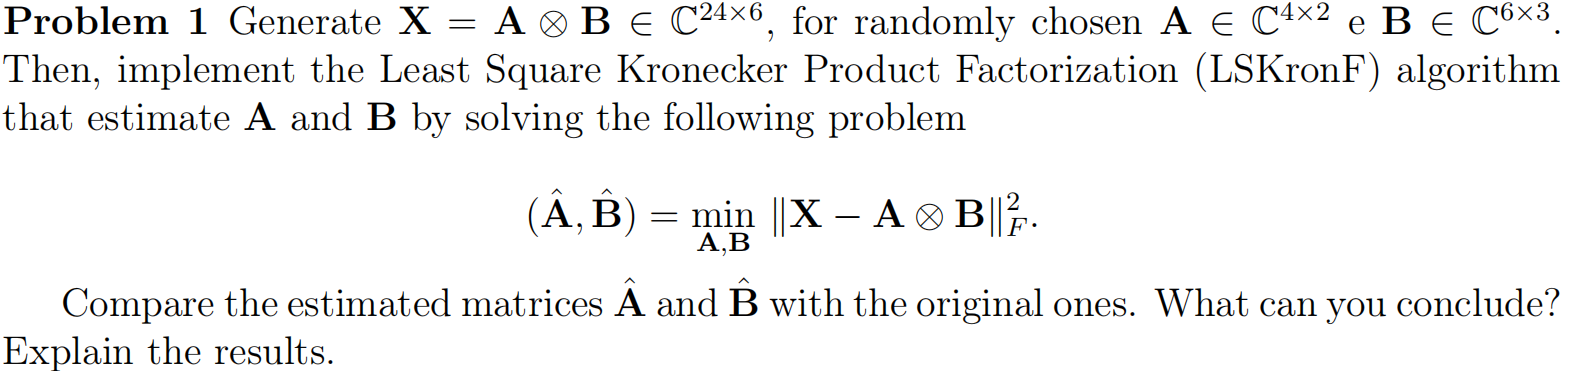

In [31]:
np.random.seed(0) # set a seed so that random matrices fixed

I, P = 4, 2
J, Q = 6, 3

A = randn(I, P)
B = randn(J, Q)

np.random.seed(1)

A = A + randn(I, P)*1j
B = B + randn(J, Q)*1j

X = kron(A, B)

In [32]:
# for i in B:
#     print("{} & {} & {} \\\\".format(str(round(i[0], 4)).strip('(').strip(')'), str(round(i[1], 4)).strip('(').strip(')'), str(round(i[2], 4)).strip('(').strip(')')))

In [33]:
######### X-tilde calculation ###############
# Naive version for correctness verification using vec(B).vec(A)T

X_til_naive = np.outer(B.T.reshape(1, -1), A.T.reshape(1, -1))
    
######### X-tilde calculation ###############
# Actual method

X_til = []

for n_matrix in np.hsplit(X, P):
    for a_B in np.vsplit(n_matrix, I):
        X_til.append(a_B.T.reshape(1, -1)[0])
        
X_til = np.array(X_til).T

# assert correctness
assert norm(X_til - X_til_naive) == 0


########## LSKronF ################

U, S, Vh = svd(X_til)

vec_A_hat = np.sqrt(S[0])*Vh[0,:]
vec_B_hat = np.sqrt(S[0])*U[:,0]



In [34]:
for i in vec_B_hat.reshape(6, 3):
    print("{} & {} & {} \\\\".format(str(round(i[0], 4)).strip('(').strip(')'), str(round(i[1], 4)).strip('(').strip(')'), str(round(i[2], 4)).strip('(').strip(')')))

-0.2739+0.1545j & 2.3123-0.4975j & -0.4141+1.0643j \\
0.4162-0.736j & -1.0622-2.3814j & -0.8313-0.1248j \\
0.4417+0.0888j & 0.7299+0.261j & 0.929-0.5469j \\
0.1892+0.228j & -0.2763+1.2051j & 0.9937+2.0636j \\
-0.8295+1.1003j & 0.3279-0.1877j & 1.1404+0.8303j \\
-0.9596-0.1405j & 0.0236+1.1713j & -0.5691-1.3957j \\


C:\Users\saulo_mendes\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  


In [35]:
estimated = np.outer(vec_B_hat.T.reshape(1, -1), vec_A_hat.T.reshape(1, -1))

round(norm(X_til - estimated),17) 

2.854e-14

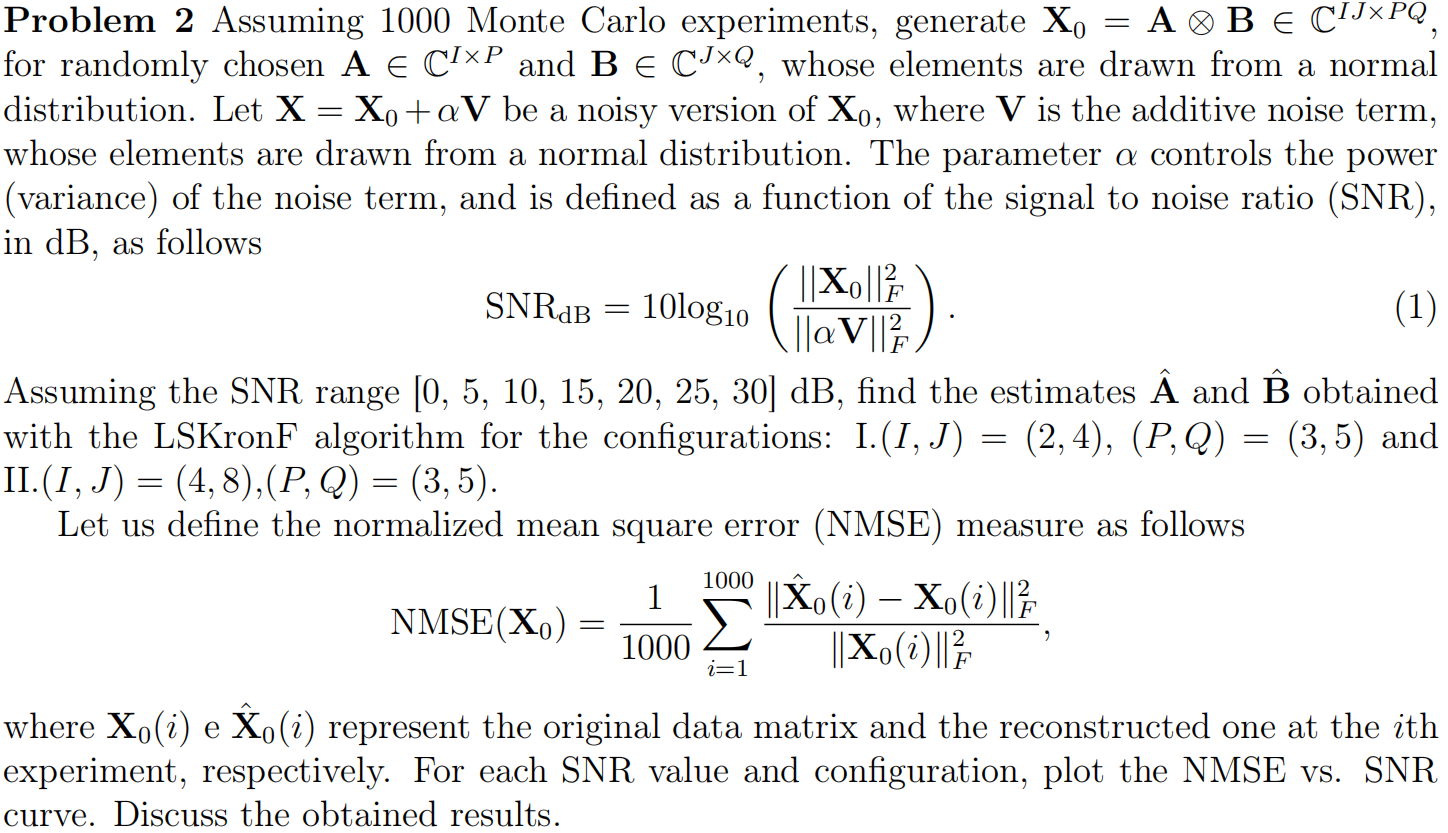

In [36]:
def error(X_0, X_0_hat):
    return norm(X_0_hat - X_0, 'fro')**2/norm(X_0, 'fro')**2

In [37]:
I, P = 2, 3
J, Q = 4, 5

SNRdb_range = [0, 5, 10, 15, 20, 25, 30]
No_experiments = 1000

# randn method gets random floats sampled from a univariate 
# “normal” (Gaussian) distribution of mean 0 and variance 1

NMSE_2435 = []

for SNRdb in SNRdb_range:
    exp_errors = [] # list of errors for the experiments
    
    for i in range(No_experiments):

        # generating X_0 and V (noise matrix)
        A = randn(I, P)
        B = randn(J, Q)
        V = randn(J*Q, I*P)
        
        A = A + randn(I, P)*1j
        B = B + randn(J, Q)*1j
        V = V + randn(J*Q, I*P)*1j

        X_0 = kron(A, B)
        
        # reshaping the matrix in vec(A)vec(B)^T form        
        X_til = []

        for n_matrix in np.hsplit(X_0, P):
            for a_B in np.vsplit(n_matrix, I):
                X_til.append(a_B.T.reshape(1, -1)[0])

        X_til = np.array(X_til).T
        
        assert X_til.shape == (J*Q, I*P) # guarantee that the shape is correct
        
        X_0 = X_til

        # calculating alpha and X
        alpha = np.sqrt((1/10**(SNRdb/10))*(norm(X_0, 'fro')**2/norm(V, 'fro')**2))
        X = X_0 + alpha*V

        # LSKronF on X to estimate A_hat and B_hat
        A_hat = []
        B_hat = []
        
        U, S, Vh = svd(X)

        vec_A_hat = np.sqrt(S[0])*Vh[0,:]
        vec_B_hat = np.sqrt(S[0])*U[:,0]

        # calculating X_0_hat based on estimations
        X_0_hat = np.outer(vec_B_hat.T.reshape(1, -1), vec_A_hat.T.reshape(1, -1))
        
        # calculating error of X_0_hat estimation
        exp_errors.append(error(X_0, X_0_hat))

    # saving NMSE for this SNRdb value
    NMSE_2435.append(np.sum(exp_errors)/No_experiments)
    

In [38]:
NMSE_2435

[0.2296970157329606,
 0.06840540051123191,
 0.02100313526069548,
 0.006573956252904621,
 0.00207690075664941,
 0.0006575529744274737,
 0.00020786727868750998]

In [39]:
I, P = 4, 3
J, Q = 8, 5

SNRdb_range = [0, 5, 10, 15, 20, 25, 30]
No_experiments = 1000

# randn method gets random floats sampled from a univariate 
# “normal” (Gaussian) distribution of mean 0 and variance 1

NMSE_4835 = []

for SNRdb in SNRdb_range:
    exp_errors = [] # list of errors for the experiments
    
    for i in range(No_experiments):

        # generating X_0 and V (noise matrix)
        A = randn(I, P)
        B = randn(J, Q)
        V = randn(J*Q, I*P) 
        
        A = A + randn(I, P)*1j
        B = B + randn(J, Q)*1j
        V = V + randn(J*Q, I*P)*1j

        X_0 = kron(A, B) 
        
        # reshaping the matrix in vec(A)vec(B)^T form        
        X_til = []

        for n_matrix in np.hsplit(X_0, P):
            for a_B in np.vsplit(n_matrix, I):
                X_til.append(a_B.T.reshape(1, -1)[0])

        X_til = np.array(X_til).T
        
        assert X_til.shape == (J*Q, I*P) # guarantee that the shape is correct
        
        X_0 = X_til
        
        # calculating alpha and X
        alpha = np.sqrt((1/10**(SNRdb/10))*(norm(X_0, 'fro')**2/norm(V, 'fro')**2))
        X = X_0 + alpha*V

        # LSKronF on X to estimate A_hat and B_hat
        A_hat = []
        B_hat = []
        
        U, S, Vh = svd(X)

        vec_A_hat = np.sqrt(S[0])*Vh[0,:]
        vec_B_hat = np.sqrt(S[0])*U[:,0]

        # calculating X_0_hat based on estimations
        X_0_hat = np.outer(vec_B_hat.T.reshape(1, -1), vec_A_hat.T.reshape(1, -1))
        
        # calculating error of X_0_hat estimation
        exp_errors.append(error(X_0, X_0_hat))

    # saving NMSE for this SNRdb value
    NMSE_4835.append(np.sum(exp_errors)/No_experiments)
    

In [40]:
NMSE_4835

[0.11084022832983226,
 0.03449227354031781,
 0.010688235439723836,
 0.003377236966419618,
 0.001055731500216692,
 0.0003347374293402623,
 0.00010618040798192743]

In [43]:
import plotly.graph_objects as go

fig = go.Figure(
    layout=go.Layout(
        title="NMSE vs SNR curve",
        template="simple_white"))

fig.add_trace(go.Scatter(x=SNRdb_range, y=NMSE_2435, mode='lines+markers', name='(I, J) = (2, 4)'))
fig.add_trace(go.Scatter(x=SNRdb_range, y=NMSE_4835, mode='lines+markers', name='(I, J) = (4, 8)'))

fig.update_yaxes(title='NMSE',showgrid=True,type="log")
fig.update_xaxes(title='SNR(dB)')

fig.show()